# Stellar Luminosity Modeling
## Part II – Polynomial and Interaction Regression

**Objective**: Capture nonlinear and interaction effects in stellar luminosity
using polynomial feature engineering:

$$\hat{L} = X w + b$$

In [13]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [14]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])
n = len(M)

## Dataset Visualization

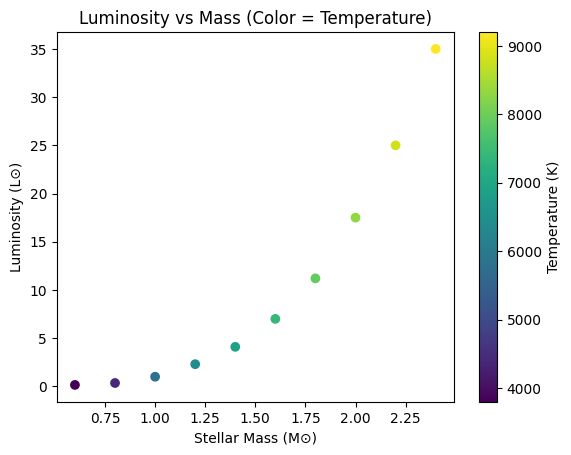

In [15]:
plt.figure()
sc = plt.scatter(M, L, c=T)
plt.colorbar(sc, label="Temperature (K)")
plt.xlabel("Stellar Mass (M⊙)")
plt.ylabel("Luminosity (L⊙)")
plt.title("Luminosity vs Mass (Color = Temperature)")
plt.show()

**Observation**: For a given mass, hotter stars tend to be more luminous,
motivating the inclusion of temperature and interaction terms.

## Feature Engineering
X = [M, T, M^2, M*T]

In [16]:
def build_features(M, T, mode="M3"):
    if mode == "M1":
        return np.column_stack([M, T])
    elif mode == "M2":
        return np.column_stack([M, T, M**2])
    elif mode == "M3":
        return np.column_stack([M, T, M**2, M*T])
    else:
        raise ValueError("Unknown mode")

## Loss and Gradients (Vectorized)

In [17]:
def predict(X, w, b):
    return X @ w + b

def mse(y, y_hat):
    return np.mean((y - y_hat) ** 2)

def gradients(X, y, w, b):
    errors = (X @ w + b) - y
    dw = 2 / len(y) * (X.T @ errors)
    db = 2 * np.mean(errors)
    return dw, db

## Gradient Descent Training

In [18]:
def train_model(X, y, lr=1e-12, iterations=5000):
    w = np.zeros(X.shape[1])
    b = 0.0
    losses = []
    for _ in range(iterations):
        dw, db = gradients(X, y, w, b)
        w -= lr * dw
        b -= lr * db
        losses.append(mse(y, predict(X, w, b)))
    return w, b, losses

## Feature Selection Experiment

In [19]:
models = ["M1", "M2", "M3"]
results = {}

for m in models:
    X = build_features(M, T, m)
    w, b, losses = train_model(X, L)
    results[m] = (X, w, b, losses)
    print(f"{m}: final loss = {losses[-1]:.4f}")

M1: final loss = 138.1700
M2: final loss = 138.1700
M3: final loss = 41.3935


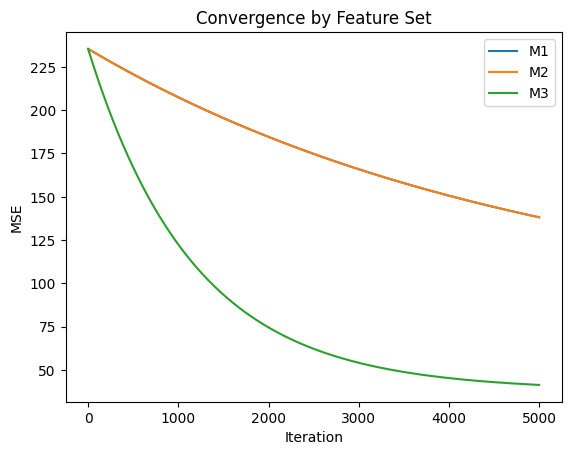

In [20]:
plt.figure()
for m in models:
    plt.plot(results[m][3], label=m)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.legend()
plt.title("Convergence by Feature Set")
plt.show()

## Predicted vs Actual

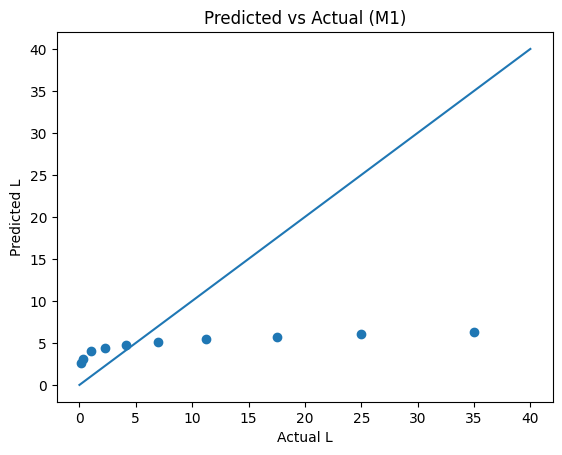

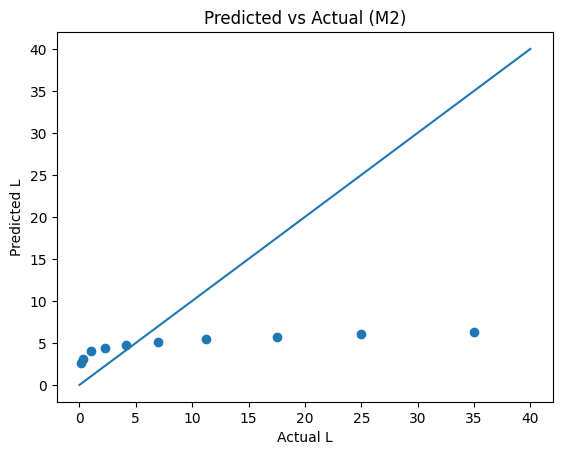

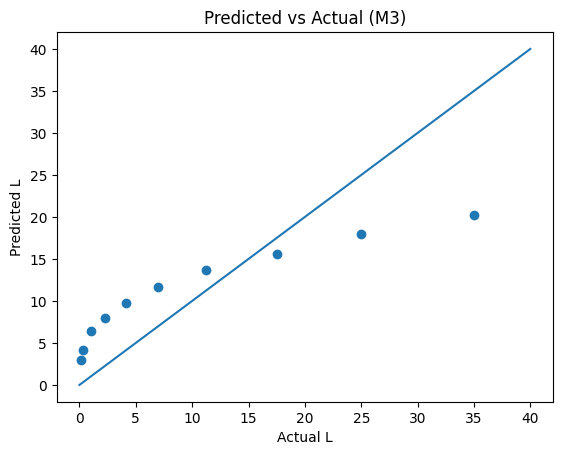

In [21]:
for m in models:
    X, w, b, _ = results[m]
    L_hat = predict(X, w, b)
    plt.figure()
    plt.scatter(L, L_hat)
    plt.plot([0, 40], [0, 40])
    plt.xlabel("Actual L")
    plt.ylabel("Predicted L")
    plt.title(f"Predicted vs Actual ({m})")
    plt.show()

**Result**: Each additional feature reduces loss. Interaction terms capture
coupled physical effects between mass and temperature.

## Cost vs Interaction Coefficient (M3)

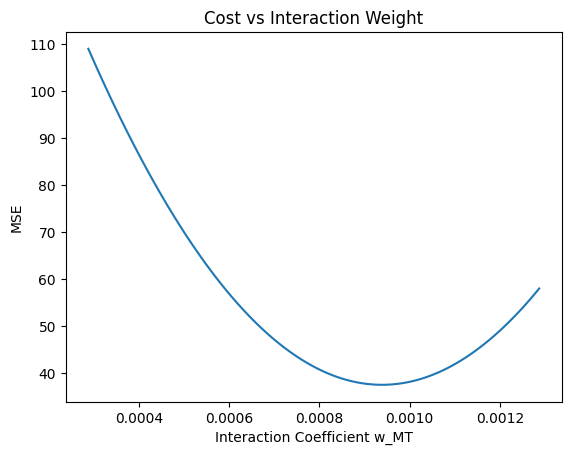

In [29]:
X, w, b, _ = results["M3"]
w_MT_vals = np.linspace(w[3] - 0.0005, w[3] + 0.0005, 100)
costs = []

for val in w_MT_vals:
    w_test = w.copy()
    w_test[3] = val
    costs.append(mse(L, predict(X, w_test, b)))

plt.figure()
plt.plot(w_MT_vals, costs)
plt.xlabel("Interaction Coefficient w_MT")
plt.ylabel("MSE")
plt.title("Cost vs Interaction Weight")
plt.show()

**Interpretation**: A clear minimum indicates that the interaction term is
meaningful and contributes significantly to model accuracy.

## Inference Demo

In [25]:
M_new = 1.3
T_new = 6600
X_new = np.array([M_new, T_new, M_new**2, M_new*T_new])
X, w, b, _ = results["M3"]
L_pred = X_new @ w + b

print(f"Predicted luminosity for M=1.3, T=6600K: {L_pred:.2f} L⊙")

Predicted luminosity for M=1.3, T=6600K: 8.80 L⊙


**Comment**: The predicted luminosity lies between nearby data points,
consistent with main-sequence stellar behavior.